# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [74]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
import graphviz
import pydotplus
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [111]:
df = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/albumin_cleaned_9.csv')

In [112]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [113]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
2    0                 0                   0            1.0    3   
3    0                 0                   0            3.0    2   
4    1                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0               2.9            0.0                0.0                 0.0   
1               3.1            0.0                0.0                 1.0   
2               2.2            0.0                0.0                 1.0   
3               1.5            0.0                0.0                 1.0   
4               3.5            1.0                0.0                 1.0   

   unknown_albumin_type  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0      1          0             1            0   
1                   0.0      0          1             0            0   
2                   0.0      0          1             0            0   
3                   0.0      0          1             0            0   
4                   0.0      1          0             1            0   

   30_day_mortality  30_day_readmission  SAPS  LOS_days  
0                 0                   0    34         2  
1                 0                   1    18         2  
2                 0                   0    29         2  
3                 0                   0    43         1  
4                 0                   1    34         2

In [114]:
df.shape

(61109, 18)

In [115]:
df.drop(columns=['30_day_readmission', '30_day_mortality'], inplace=True)

In [116]:
#df.drop(columns=['5_percent_albumin'], inplace=True)

In [117]:
# remove ICU
# note: should remove from this analysis in earlier file
#df.drop(columns=['ICU'], inplace=True)

In [118]:
#df.drop(columns=['CCI'], inplace=True)

In [83]:
#df.drop(columns=['qSOFA'], inplace=True)

In [119]:
#df.drop(columns=['albumin'], inplace=True)

In [120]:
df.describe()

ICU  mass_transfusion  total_transfusions  anemia_status  \
count  61109.000000      61109.000000        61109.000000   61109.000000   
mean       0.210444          0.030307            0.581764       1.701795   
std        0.407627          0.171431            0.968769       1.116495   
min        0.000000          0.000000            0.000000       0.000000   
25%        0.000000          0.000000            0.000000       1.000000   
50%        0.000000          0.000000            0.000000       2.000000   
75%        0.000000          0.000000            1.000000       3.000000   
max        1.000000          1.000000            5.000000       3.000000   

                CCI  bl_albumin_value  albumin_24hrs  5_percent_albumin  \
count  61109.000000      61109.000000   61109.000000       61109.000000   
mean       3.979414          3.022666       0.084996           0.070579   
std        2.733080          0.699047       0.278878           0.256122   
min        0.000000          0.002700       0.000000           0.000000   
25%        2.000000          2.600000       0.000000           0.000000   
50%        4.000000          3.000000       0.000000           0.000000   
75%        6.000000          3.500000       0.000000           0.000000   
max       19.000000          6.300000       1.000000           1.000000   

       25_percent_albumin  unknown_albumin_type         qSOFA     Cirrhosis  \
count        61109.000000          61109.000000  61109.000000  61109.000000   
mean             0.116186              0.114140      0.504787      0.272857   
std              0.320450              0.317984      0.697482      0.445431   
min              0.000000              0.000000      0.000000      0.000000   
25%              0.000000              0.000000      0.000000      0.000000   
50%              0.000000              0.000000      0.000000      0.000000   
75%              0.000000              0.000000      1.000000      1.000000   
max              1.000000              1.000000      3.000000      1.000000   

       beta_blocker   hemorrhagic          SAPS     LOS_days  
count  61109.000000  61109.000000  61109.000000  61109.00000  
mean       0.336481      0.073950     26.358818      0.80160  
std        0.472509      0.261691     11.067891      0.82177  
min        0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000     18.000000      0.00000  
50%        0.000000      0.000000     25.000000      1.00000  
75%        1.000000      0.000000     33.000000      2.00000  
max        1.000000      1.000000     64.000000      2.00000

In [121]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

## Modeling

In [122]:
# establish target feature, LOS_days, as y feature
y = df['LOS_days']
# drop target feature from features dataframe
X = df.drop(columns = ['LOS_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [123]:
cols

Index(['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI',
       'bl_albumin_value', 'albumin_24hrs', '5_percent_albumin',
       '25_percent_albumin', 'unknown_albumin_type', 'qSOFA', 'Cirrhosis',
       'beta_blocker', 'hemorrhagic', 'SAPS'],
      dtype='object')

## Standardize Data

In [124]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [125]:
X.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
2    0                 0                   0            1.0    3   
3    0                 0                   0            3.0    2   
4    1                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0               2.9            0.0                0.0                 0.0   
1               3.1            0.0                0.0                 1.0   
2               2.2            0.0                0.0                 1.0   
3               1.5            0.0                0.0                 1.0   
4               3.5            1.0                0.0                 1.0   

   unknown_albumin_type  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  
0                   1.0      1          0             1            0    34  
1                   0.0      0          1             0            0    18  
2                   0.0      0          1             0            0    29  
3                   0.0      0          1             0            0    43  
4                   0.0      1          0             1            0    34

## Train Test Split

In [126]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Multinomial Logistic Regression

In [127]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(multi_class='multinomial')

Feature: ICU Score: -0.27238
Feature: mass_transfusion Score: -0.19216
Feature: total_transfusions Score: 0.00902
Feature: anemia_status Score: 0.16652
Feature: CCI Score: -0.10915
Feature: bl_albumin_value Score: 0.26177
Feature: albumin_24hrs Score: 0.33117
Feature: 5_percent_albumin Score: -0.46195
Feature: 25_percent_albumin Score: -0.74959
Feature: unknown_albumin_type Score: -0.92202
Feature: qSOFA Score: -0.12065
Feature: Cirrhosis Score: 0.49641
Feature: beta_blocker Score: -0.24731
Feature: hemorrhagic Score: -0.13109
Feature: SAPS Score: -0.00863


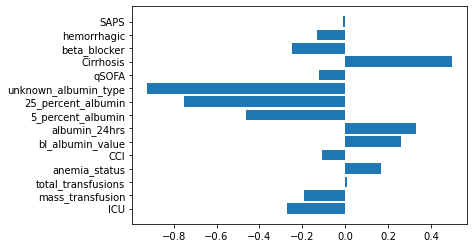

In [128]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                      Importance
Cirrhosis               1.642808
albumin_24hrs           1.392599
bl_albumin_value        1.299222
anemia_status           1.181186
total_transfusions      1.009066
SAPS                    0.991409
CCI                     0.896592
qSOFA                   0.886345
hemorrhagic             0.877135
mass_transfusion        0.825172
beta_blocker            0.780902
ICU                     0.761564
5_percent_albumin       0.630056
25_percent_albumin      0.472559
unknown_albumin_type    0.397714


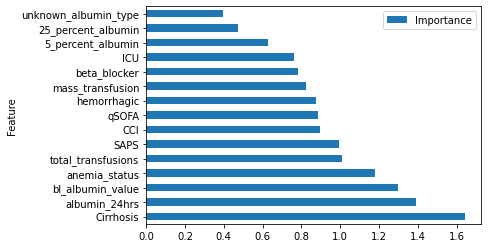

In [129]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [130]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [131]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[19359  1440  1467]
 [ 9808  1597  2559]
 [ 5127  1336  6194]]


In [132]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68     22266
           1       0.37      0.11      0.17     13964
           2       0.61      0.49      0.54     12657

    accuracy                           0.56     48887
   macro avg       0.51      0.49      0.47     48887
weighted avg       0.52      0.56      0.50     48887



In [133]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4910  369  353]
 [2420  412  641]
 [1262  339 1516]]


In [134]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.57      0.87      0.69      5632
           1       0.37      0.12      0.18      3473
           2       0.60      0.49      0.54      3117

    accuracy                           0.56     12222
   macro avg       0.51      0.49      0.47     12222
weighted avg       0.52      0.56      0.51     12222



## 1: Decision Tree (Max Depth=3)

In [135]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Feature: ICU Score: 0.00000
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.00000
Feature: anemia_status Score: 0.00958
Feature: CCI Score: 0.15383
Feature: bl_albumin_value Score: 0.00000
Feature: albumin_24hrs Score: 0.09773
Feature: 5_percent_albumin Score: 0.00000
Feature: 25_percent_albumin Score: 0.21299
Feature: unknown_albumin_type Score: 0.51703
Feature: qSOFA Score: 0.00000
Feature: Cirrhosis Score: 0.00884
Feature: beta_blocker Score: 0.00000
Feature: hemorrhagic Score: 0.00000
Feature: SAPS Score: 0.00000


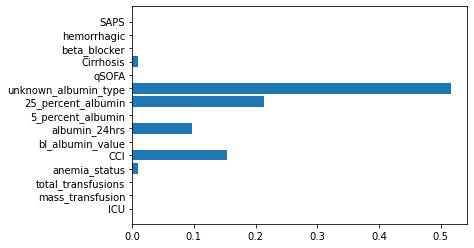

In [136]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [137]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [138]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[21340     0   926]
 [12170     0  1794]
 [ 7763     0  4894]]


In [139]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.52      0.96      0.67     22266
           1       0.00      0.00      0.00     13964
           2       0.64      0.39      0.48     12657

    accuracy                           0.54     48887
   macro avg       0.39      0.45      0.38     48887
weighted avg       0.40      0.54      0.43     48887



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[5384    0  248]
 [3032    0  441]
 [1960    0 1157]]


In [141]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.52      0.96      0.67      5632
           1       0.00      0.00      0.00      3473
           2       0.63      0.37      0.47      3117

    accuracy                           0.54     12222
   macro avg       0.38      0.44      0.38     12222
weighted avg       0.40      0.54      0.43     12222



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


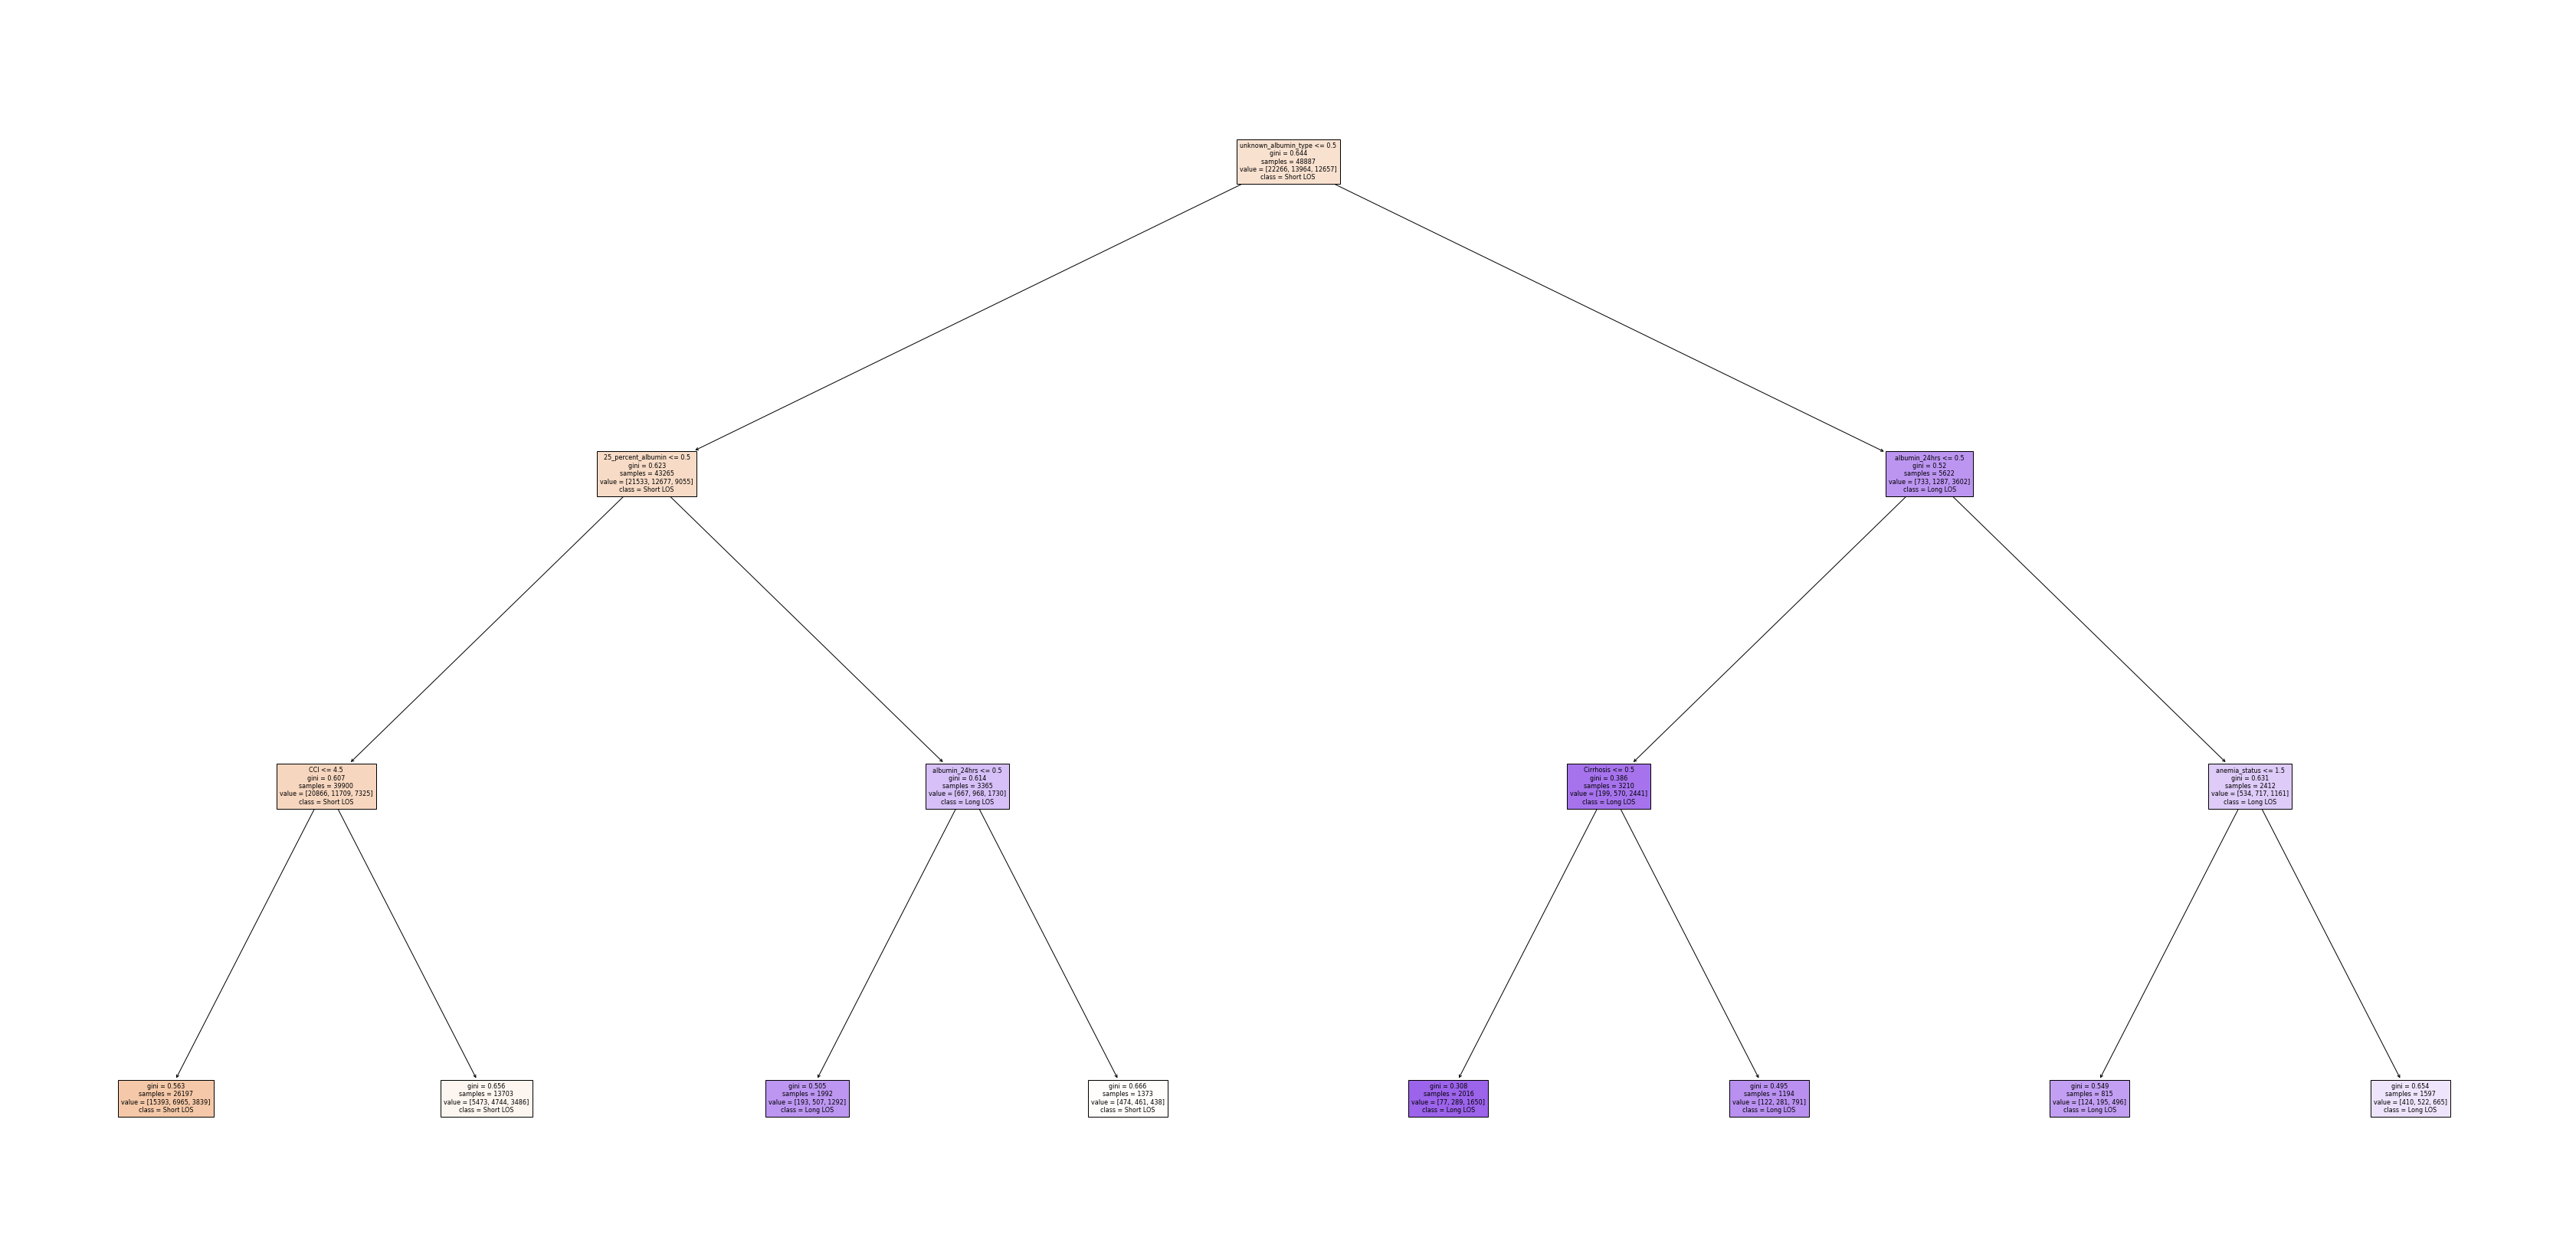

In [142]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [143]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('DT_D3.png')

True

## 2: Decision Tree (Max Depth=4)

In [144]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: ICU Score: 0.00000
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.00000
Feature: anemia_status Score: 0.03904
Feature: CCI Score: 0.13658
Feature: bl_albumin_value Score: 0.00000
Feature: albumin_24hrs Score: 0.08676
Feature: 5_percent_albumin Score: 0.00960
Feature: 25_percent_albumin Score: 0.19611
Feature: unknown_albumin_type Score: 0.45903
Feature: qSOFA Score: 0.06051
Feature: Cirrhosis Score: 0.01237
Feature: beta_blocker Score: 0.00000
Feature: hemorrhagic Score: 0.00000
Feature: SAPS Score: 0.00000


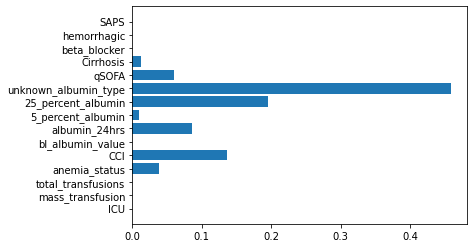

In [145]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [146]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [147]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[20251   293  1722]
 [11019   318  2627]
 [ 6396   304  5957]]


In [148]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.54      0.91      0.68     22266
           1       0.35      0.02      0.04     13964
           2       0.58      0.47      0.52     12657

    accuracy                           0.54     48887
   macro avg       0.49      0.47      0.41     48887
weighted avg       0.49      0.54      0.45     48887



In [149]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[5116   78  438]
 [2748   68  657]
 [1658   64 1395]]


In [150]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.54      0.91      0.68      5632
           1       0.32      0.02      0.04      3473
           2       0.56      0.45      0.50      3117

    accuracy                           0.54     12222
   macro avg       0.47      0.46      0.40     12222
weighted avg       0.48      0.54      0.45     12222



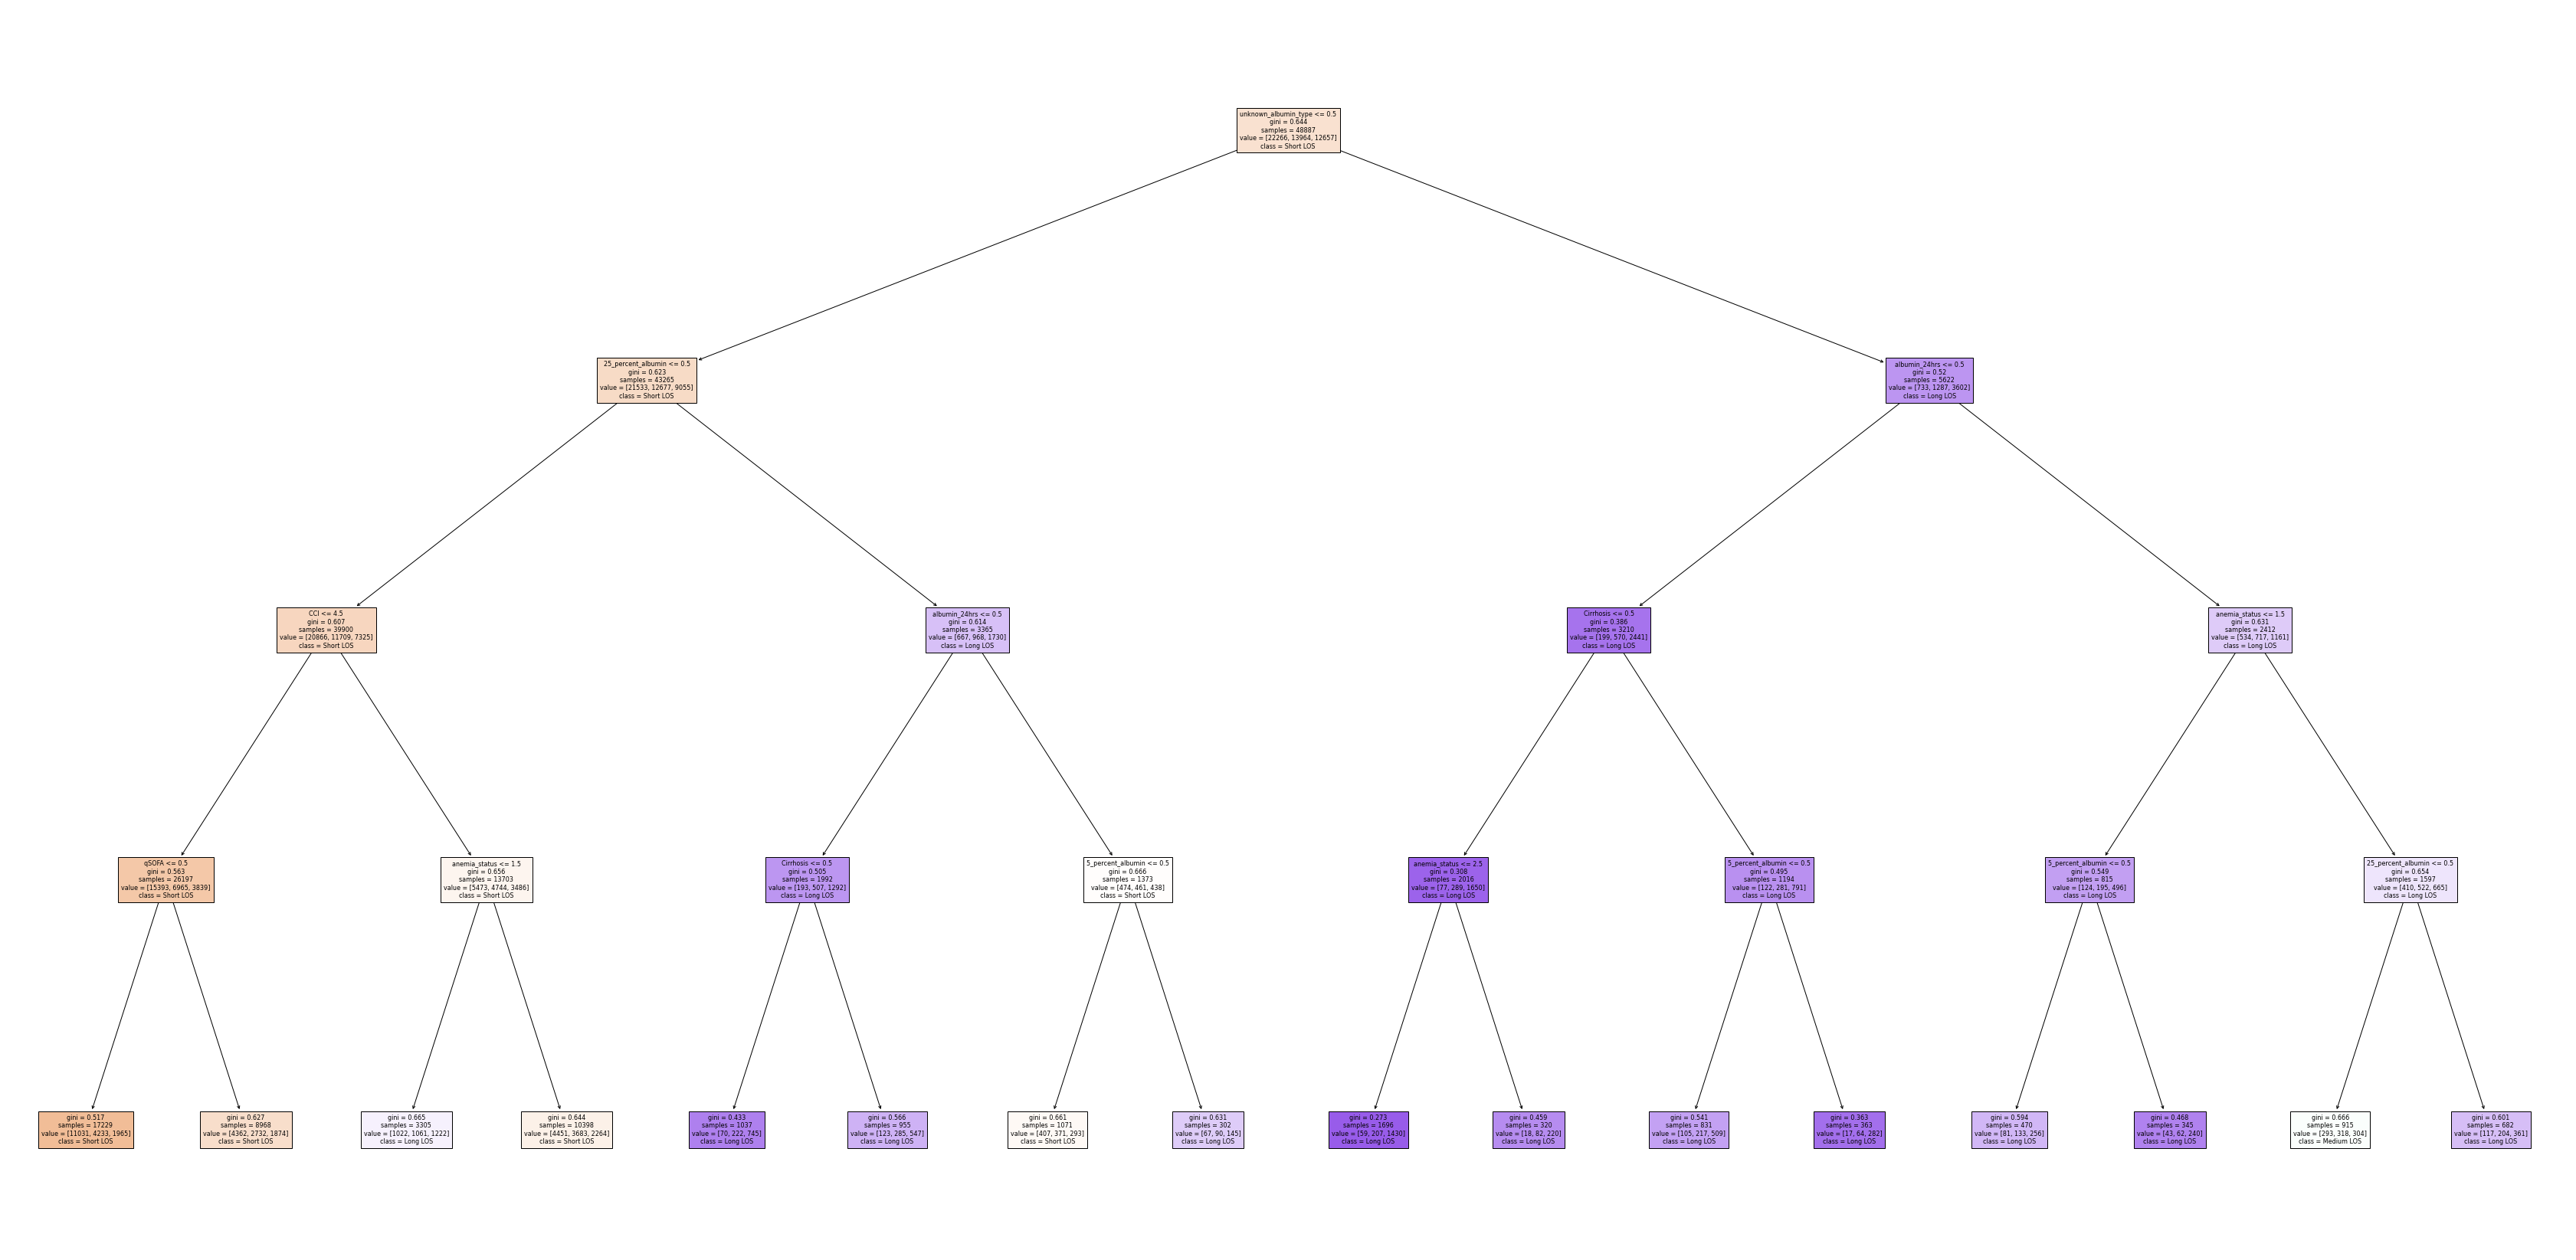

In [151]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [152]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('DT_D4.png')

True

## 3: Decision Tree 

In [153]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Feature: ICU Score: 0.00984
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.00000
Feature: anemia_status Score: 0.04042
Feature: CCI Score: 0.15068
Feature: bl_albumin_value Score: 0.00000
Feature: albumin_24hrs Score: 0.07998
Feature: 5_percent_albumin Score: 0.01386
Feature: 25_percent_albumin Score: 0.18199
Feature: unknown_albumin_type Score: 0.42314
Feature: qSOFA Score: 0.06450
Feature: Cirrhosis Score: 0.01141
Feature: beta_blocker Score: 0.00249
Feature: hemorrhagic Score: 0.00000
Feature: SAPS Score: 0.02168


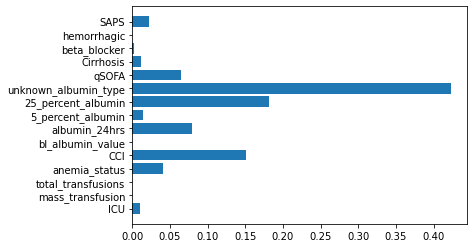

In [154]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [155]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [156]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[20072  1014  1180]
 [10615  1098  2251]
 [ 6077   978  5602]]


In [157]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68     22266
           1       0.36      0.08      0.13     13964
           2       0.62      0.44      0.52     12657

    accuracy                           0.55     48887
   macro avg       0.51      0.47      0.44     48887
weighted avg       0.51      0.55      0.48     48887



In [158]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[5050  258  324]
 [2633  275  565]
 [1538  265 1314]]


In [159]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68      5632
           1       0.34      0.08      0.13      3473
           2       0.60      0.42      0.49      3117

    accuracy                           0.54     12222
   macro avg       0.50      0.47      0.43     12222
weighted avg       0.50      0.54      0.48     12222



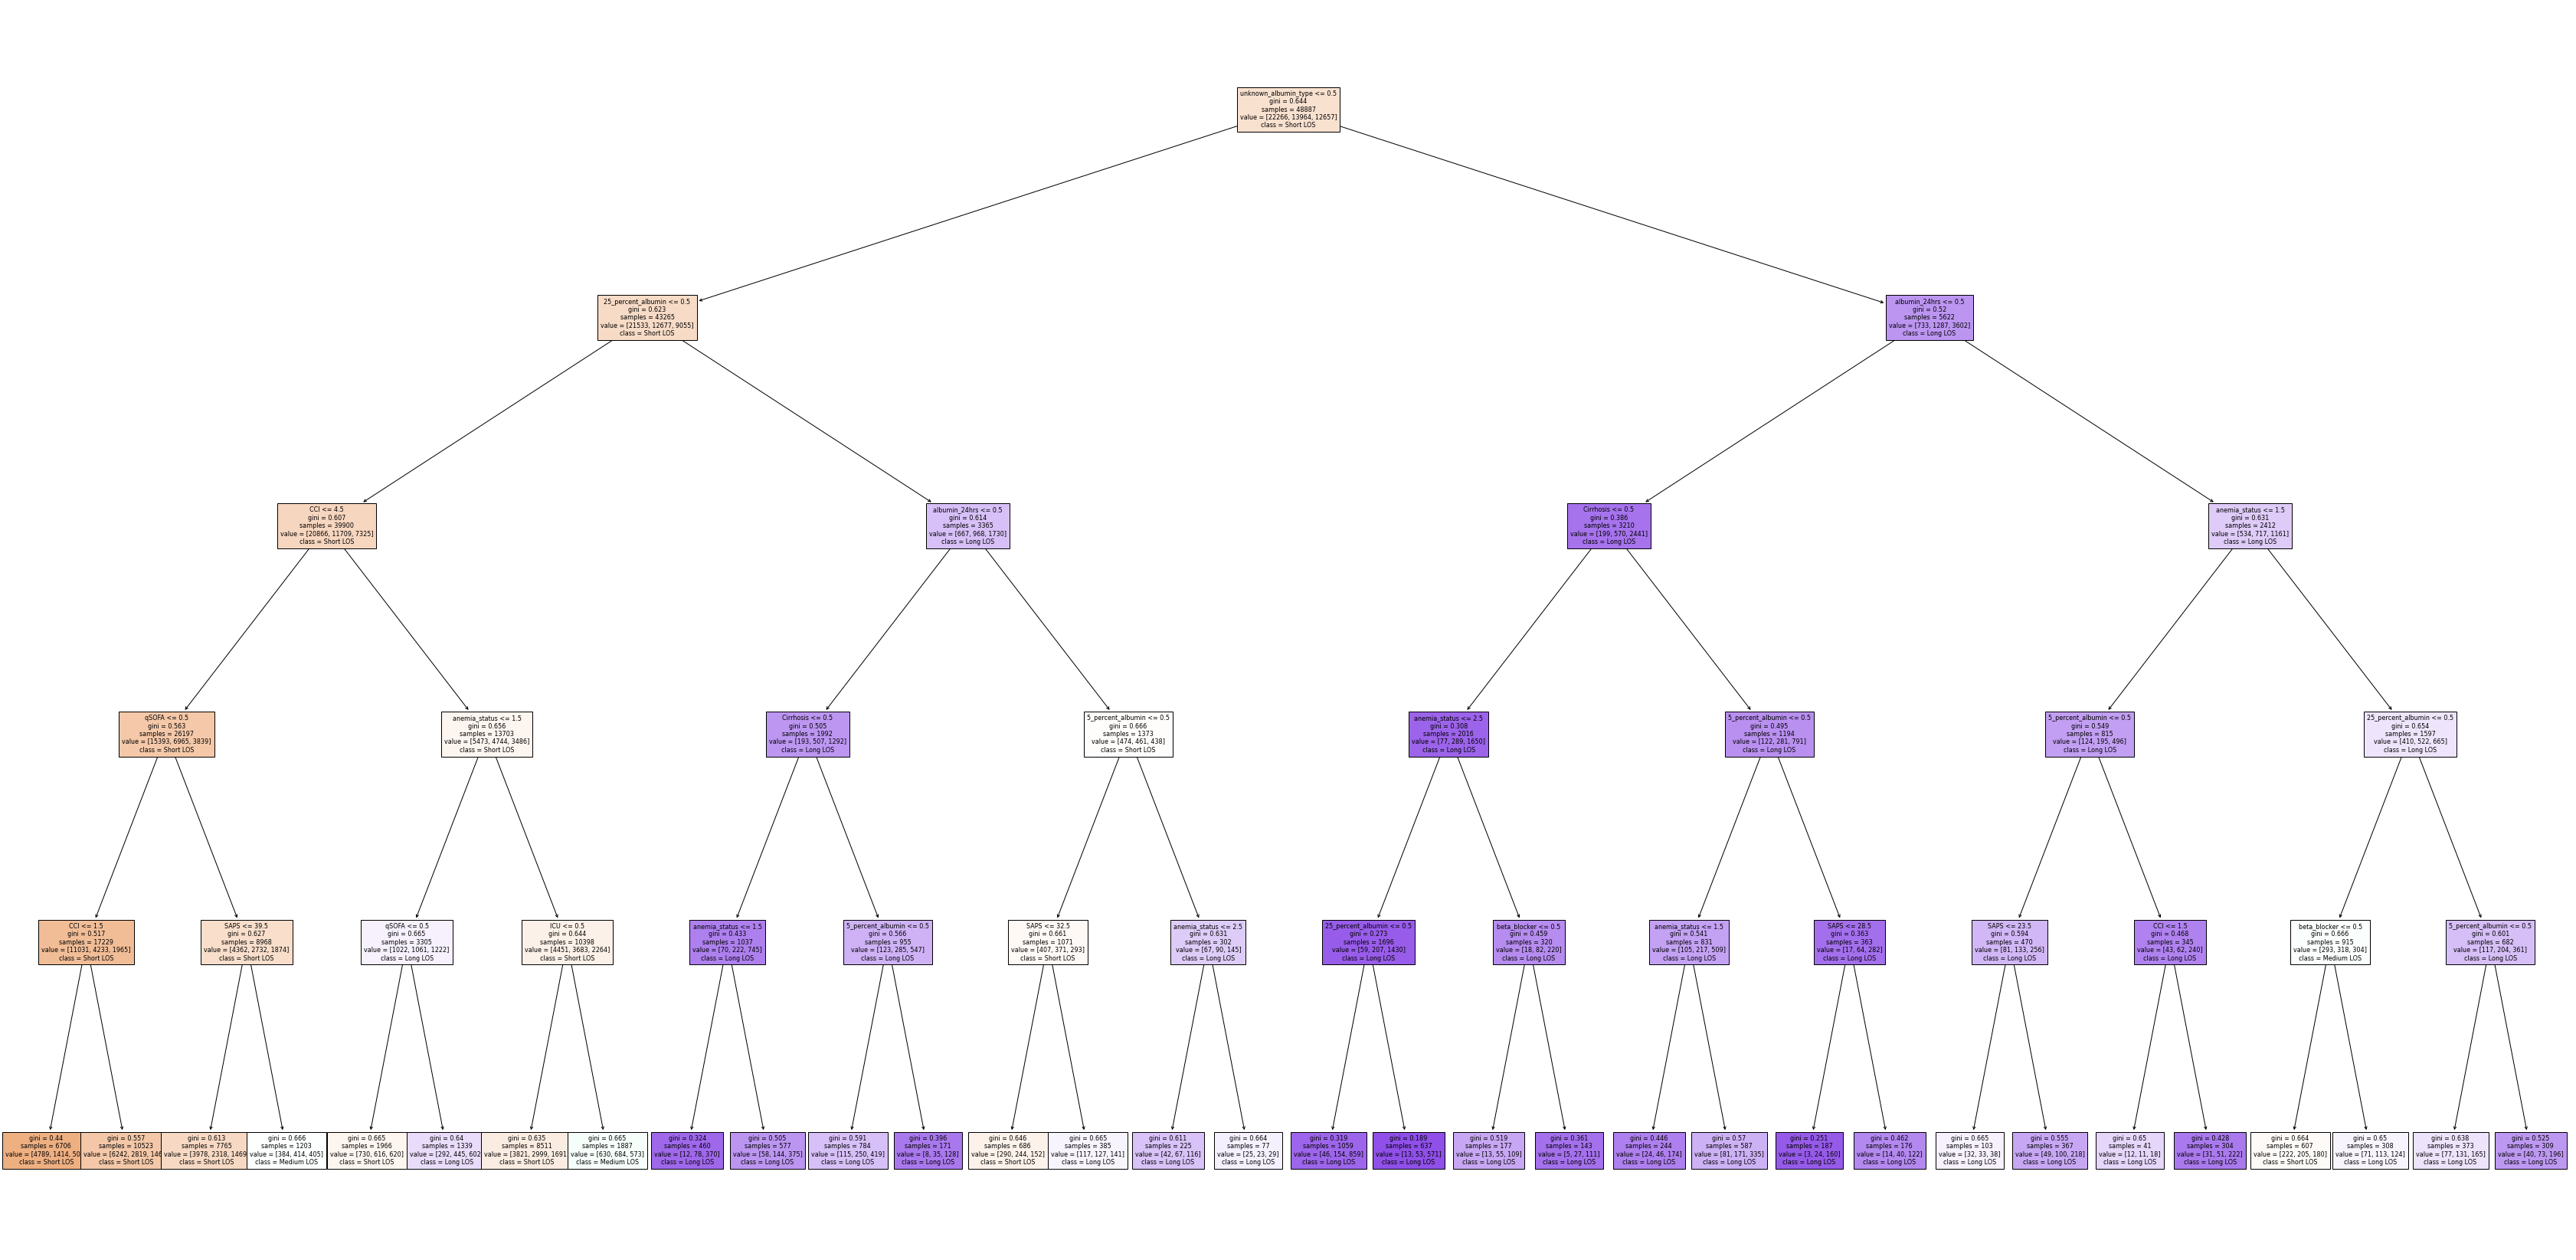

In [162]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [163]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('DT_D5.png')

True

## Optimized Model Using Grid Search

In [164]:
# instantiate a decision tree model
dt = tree.DecisionTreeClassifier()
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [165]:
# use grid search to select best parameters
# optimizing for accuracy

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

grid_cv = GridSearchCV(dt, param_grid, scoring="accuracy", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.5458301718905978


In [166]:
# instantiate a decision tree model
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf= 1, min_samples_split= 2)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Feature: ICU Score: 0.00984
Feature: mass_transfusion Score: 0.00000
Feature: total_transfusions Score: 0.00000
Feature: anemia_status Score: 0.04042
Feature: CCI Score: 0.15068
Feature: bl_albumin_value Score: 0.00000
Feature: albumin_24hrs Score: 0.07998
Feature: 5_percent_albumin Score: 0.01386
Feature: 25_percent_albumin Score: 0.18199
Feature: unknown_albumin_type Score: 0.42314
Feature: qSOFA Score: 0.06450
Feature: Cirrhosis Score: 0.01141
Feature: beta_blocker Score: 0.00249
Feature: hemorrhagic Score: 0.00000
Feature: SAPS Score: 0.02168


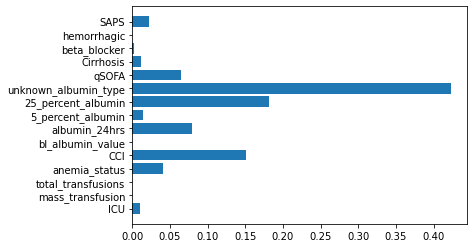

In [167]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [168]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [169]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[20072  1014  1180]
 [10615  1098  2251]
 [ 6077   978  5602]]


In [170]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68     22266
           1       0.36      0.08      0.13     13964
           2       0.62      0.44      0.52     12657

    accuracy                           0.55     48887
   macro avg       0.51      0.47      0.44     48887
weighted avg       0.51      0.55      0.48     48887



In [171]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[5050  258  324]
 [2633  275  565]
 [1538  265 1314]]


In [172]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68      5632
           1       0.34      0.08      0.13      3473
           2       0.60      0.42      0.49      3117

    accuracy                           0.54     12222
   macro avg       0.50      0.47      0.43     12222
weighted avg       0.50      0.54      0.48     12222



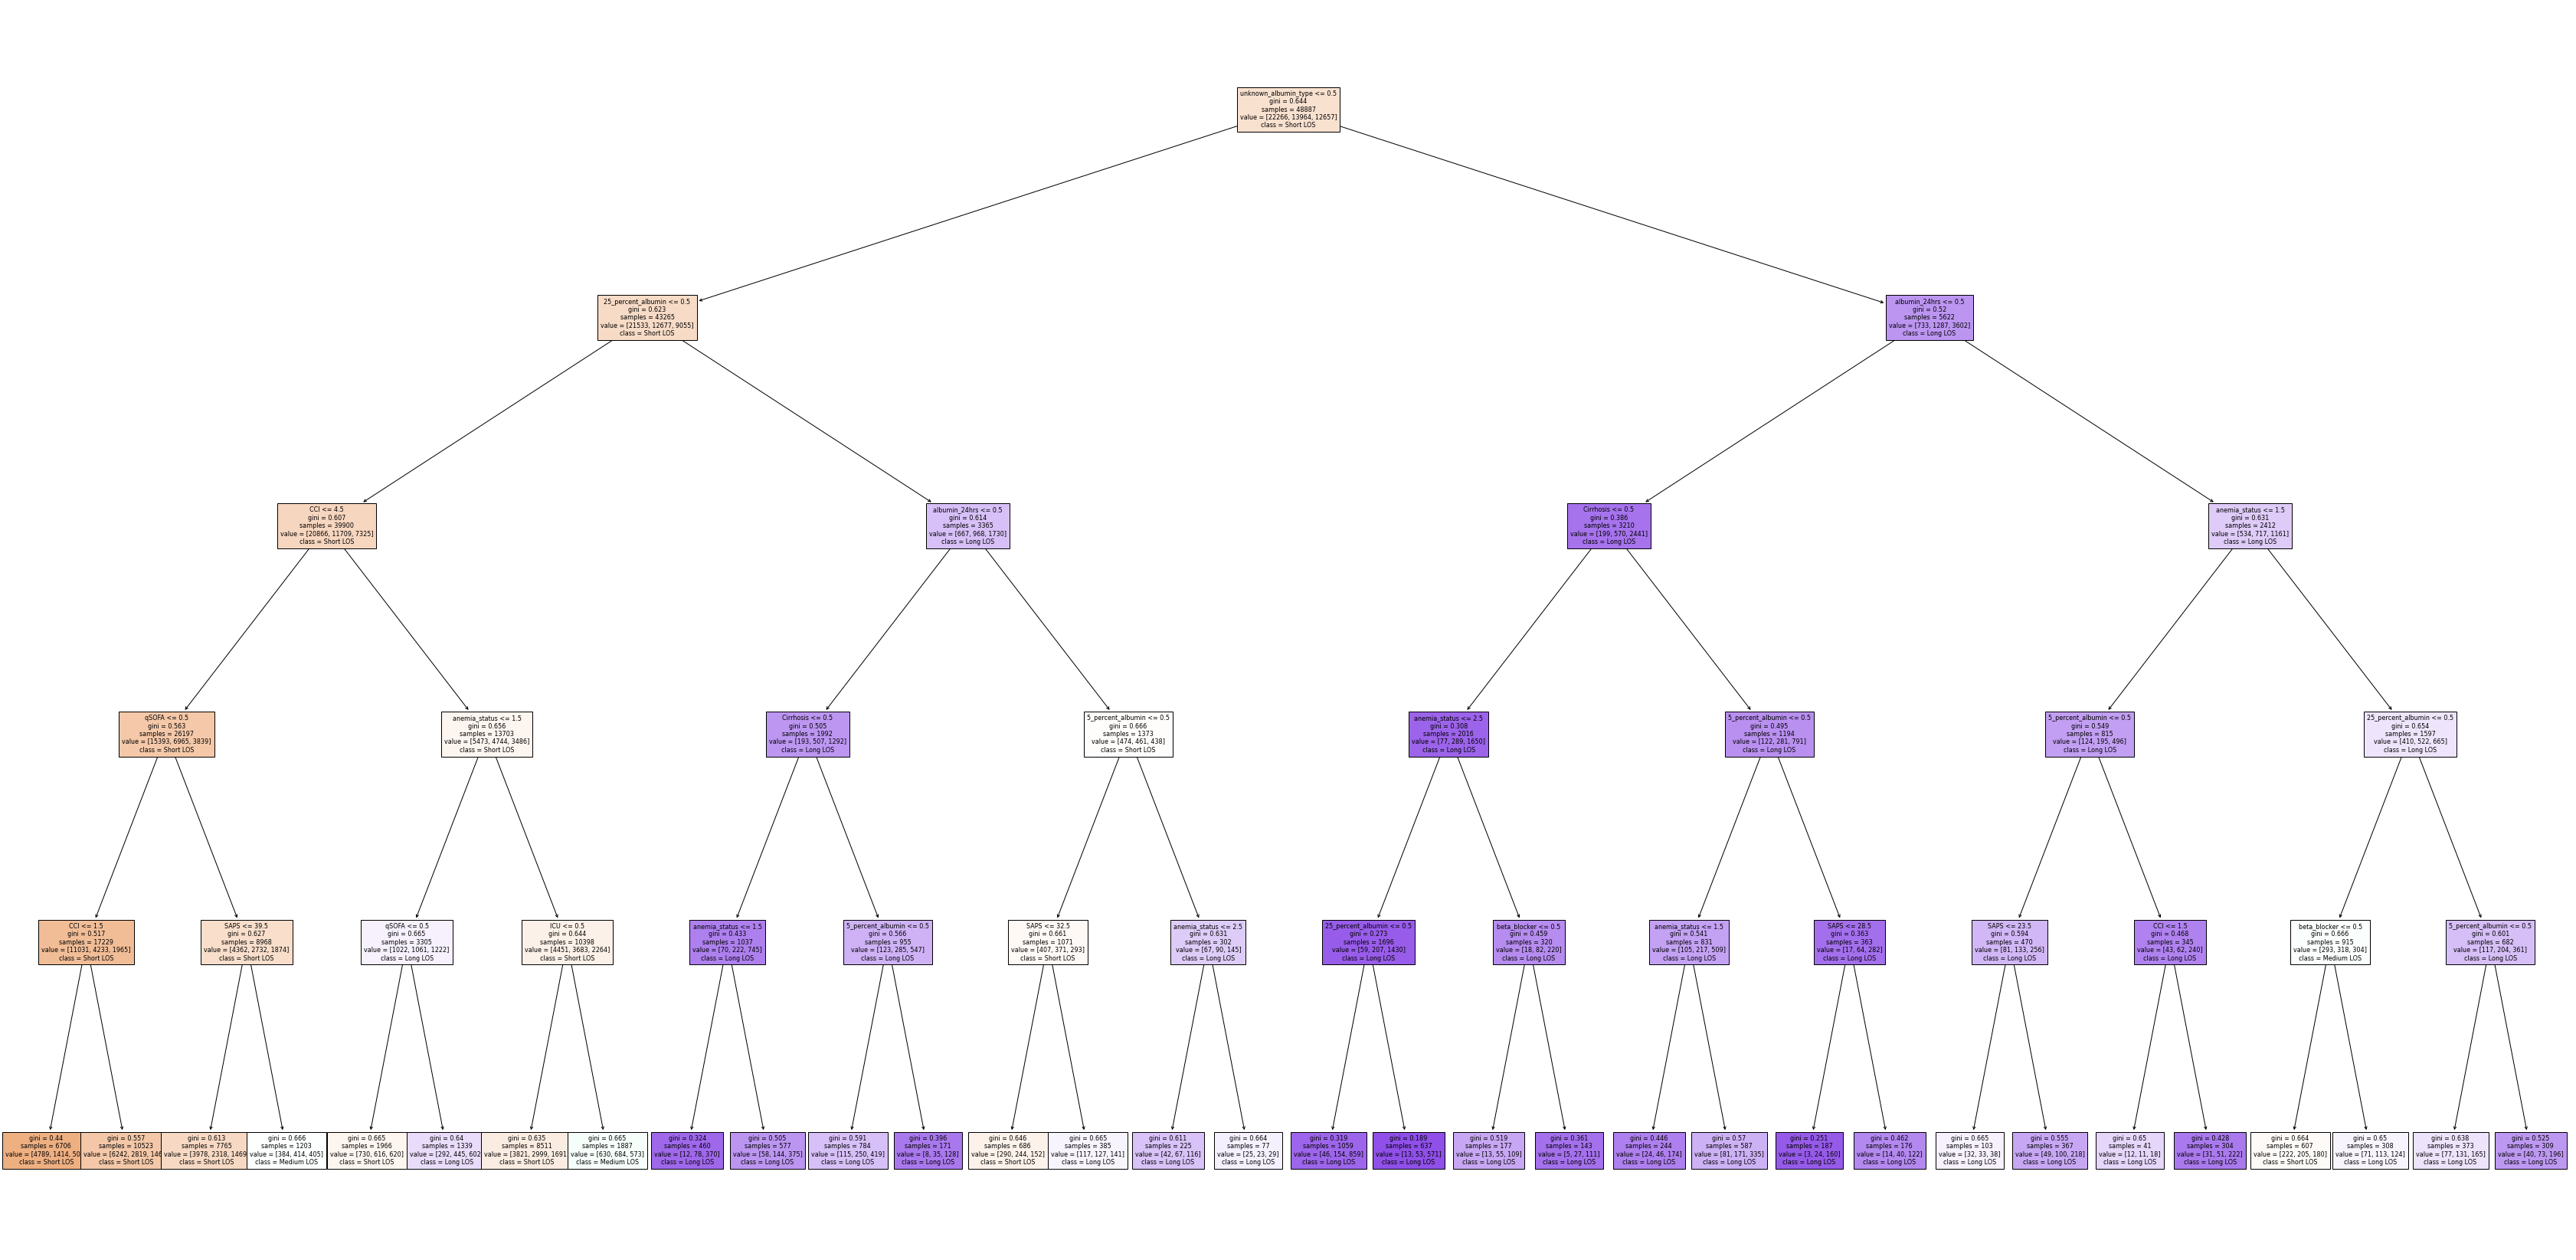

In [173]:
feature_names = X_train.columns.tolist()
class_names = ['Short LOS', 'Medium LOS', 'Long LOS']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [174]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('DT_Optimized.png')

True